<a href="https://colab.research.google.com/github/Shailja-28/unemployment_-in-_india/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import the necessary libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [35]:
pip install xgboost

In [36]:
from xgboost import XGBRegressor

##Load and prepare dataset

In [37]:
df = pd.read_csv('/content/house_price_prediction.csv')
print(df.head(10))
df.info()

    avg_income  avg_area_house_age  avg_area_num_rooms  avg_bedrooms  \
0  79545.45857            5.682861            7.009188          4.09   
1  79248.64245            6.002900            6.730821          3.09   
2  61287.06718            5.865890            8.512727          5.13   
3  63345.24005            7.188236            5.586729          3.26   
4  59982.19723            5.040555            7.839388          4.23   
5  80175.75416            4.988408            6.104512          4.04   
6  64698.46343            6.025336            8.147760          3.41   
7  78394.33928            6.989780            6.620478          2.42   
8  59927.66081            5.362126            6.393121          2.30   
9  81885.92718            4.423672            8.167688          6.10   

   avg_population         price  \
0     23086.80050  1.059034e+06   
1     40173.07217  1.505891e+06   
2     36882.15940  1.058988e+06   
3     34310.24283  1.260617e+06   
4     26354.10947  6.309435e+05 

##Define the features and target variable

In [38]:
X = df[['avg_bedrooms', 'avg_income', 'avg_population', 'avg_area_num_rooms', 'avg_area_house_age']]
y = df['price']

##Split the data into training and testing sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the linear regression model

In [40]:
model = XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##Make predictions and evaluate the model

In [41]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')


Mean Squared Error: 15284694414.884615
R-squared Value: 0.8786626215367561


##Plot the results

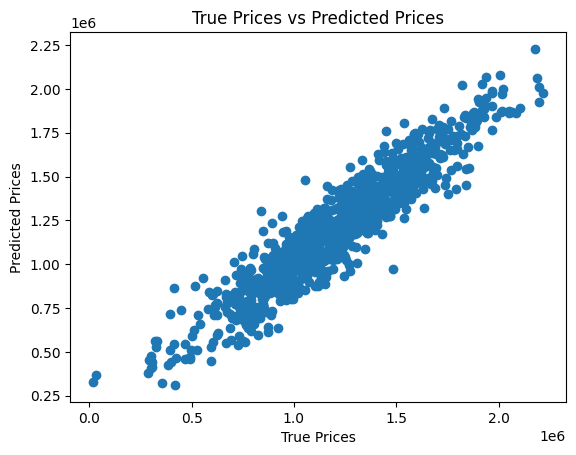

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True Prices vs Predicted Prices')
plt.show()
